<a href="https://colab.research.google.com/github/DrRauf/Data-Science-Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                   FINAL PROJECT - 05
                            

Students:

Rauf Anata - 101220889
---









In [1]:
import pandas as pd

In [2]:
# 1 - Import data (yelp.csv)

from google.colab import drive
drive.mount('/content/drive')
fileName = '/content/drive/MyDrive/Data-Science/Final-Project/yelp.csv'
df = pd.read_csv(fileName)
df.head(3)

Mounted at /content/drive


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0


In [3]:
df.shape

(10000, 10)

In [4]:
df.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
#2 Visualize the voting columns by either histogram, seaborn, or countplot.

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df["stars"].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

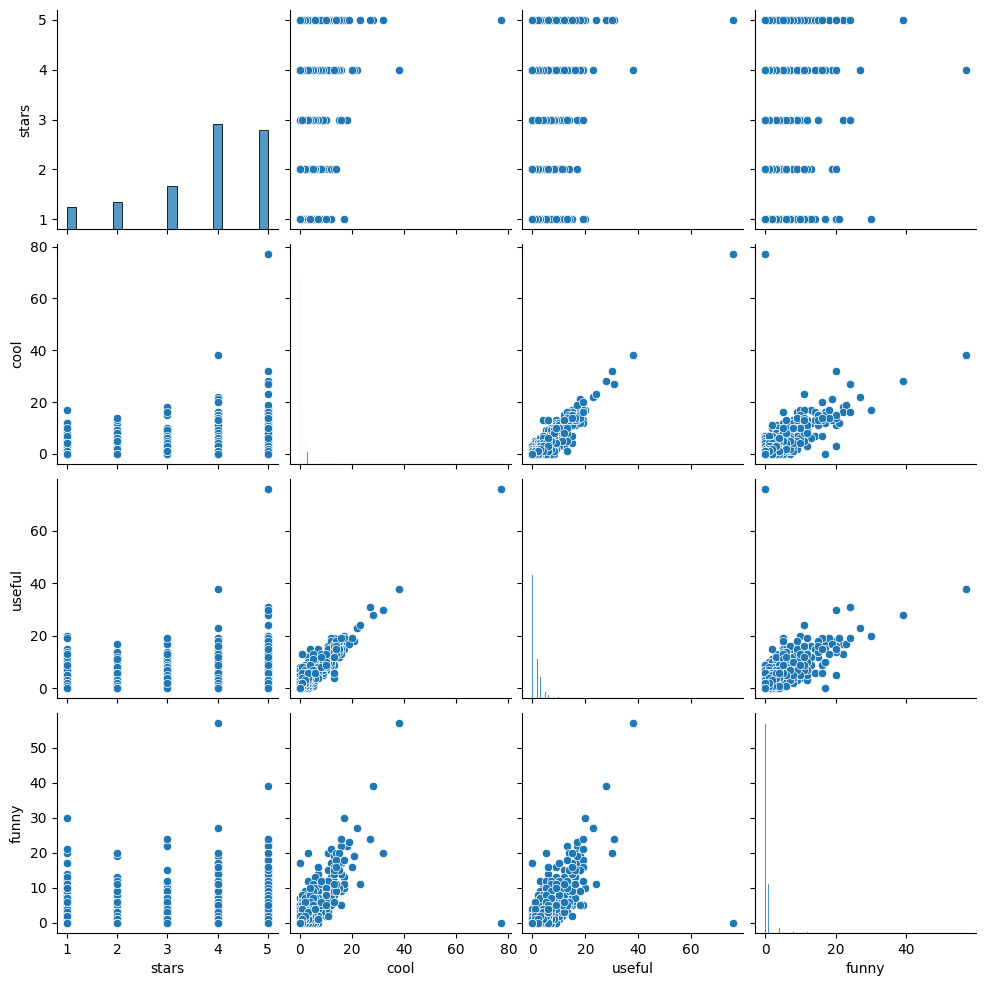

In [8]:
sns.pairplot(df)

<Axes: xlabel='stars', ylabel='Count'>

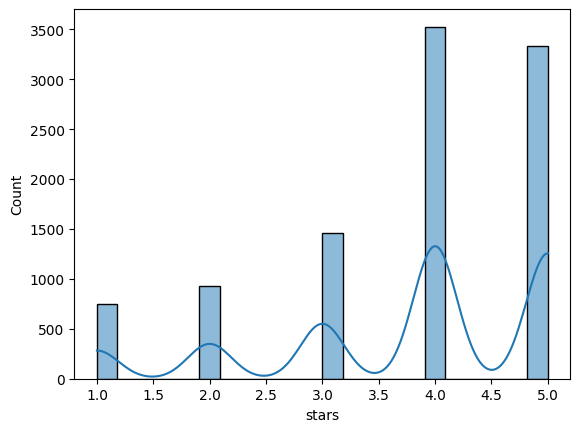

In [14]:
sns.histplot(data = df, x = 'stars' ,kde = True)

In [ ]:
#3 Make the dataframe (feature = text and label = stars) for the reviews with stars greater than zero.

In [42]:
feature = df['text']
label = df['stars']

In [16]:
print('Feature:\n', feature.head(3))
print('\nLabel:\n', label.head(3))


Feature:
 0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
2    love the gyro plate. Rice is so good and I als...
Name: text, dtype: object

Label:
 0    5
1    5
2    4
Name: stars, dtype: int64


In [17]:
#4 Tokenize the text and generate the word vector

In [39]:
from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [40]:
# create the transform
vectorizer = CountVectorizer()

In [43]:
feature = vectorizer.fit_transform(feature)

In [23]:
# 5 - Divide the dataframe into train and test sets.
# Splitting Data by 30% for Testing

X_train, X_test, y_train, y_test = train_test_split(feature, label,test_size=0.3)

In [24]:
#6 -  Fit a classifier on the train data.

clf = tree.DecisionTreeClassifier().fit(X_train, y_train)

In [25]:
#7 Predict the label of the test data.

prediction = clf.predict(X_test)

In [51]:
#8 Accuracy of the predicted

print("Accuracy Score is ", accuracy_score(y_test, prediction))

Accuracy Score is  0.377


In [48]:
cm = confusion_matrix(y_test, prediction, labels= clf.classes_)

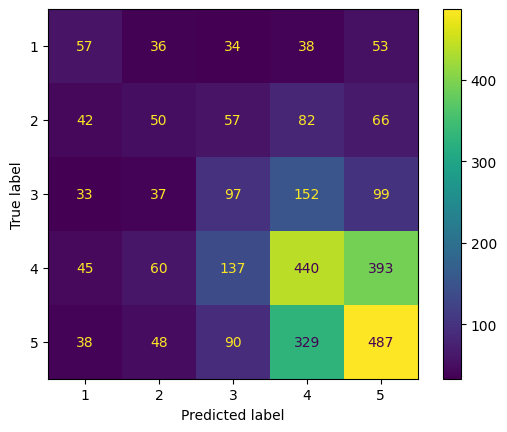

In [50]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

THE END
